In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from  sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import re
import string


In [3]:
dataset_fake=pd.read_csv('Fake.csv')
dataset_true=pd.read_csv('True.csv')

In [4]:
dataset_fake[1:4]

,title,text,subject,date
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"


In [5]:
dataset_true[1:5]

,title,text,subject,date
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
dataset_true.tail(5)

,title,text,subject,date,class
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [7]:
dataset_fake.shape, dataset_true.shape

((23481, 4), (21417, 4))

In [8]:
dataset_fake['class']=0
dataset_true['class']=1

In [9]:
dataset_fake.shape, dataset_true.shape

((23481, 5), (21417, 5))

In [10]:
dataset_fake_manual_testing=dataset_fake.tail(10)
for i in range(23480, 23470,-1):
    dataset_fake.drop([i], axis=0, inplace=True)

dataset_true_manual_testing=dataset_true.tail(10)
for i in range(21416, 21406,-1):
    dataset_true.drop([i], axis=0, inplace=True)

In [12]:
dataset_fake.shape, dataset_true.shape

((23471, 5), (21407, 5))

In [13]:
dataset_fake_manual_testing['class']=0
dataset_true_manual_testing['class']=1

C:\Users\Manasa\AppData\Local\Temp\ipykernel_22812\1070257275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_fake_manual_testing['class']=0
C:\Users\Manasa\AppData\Local\Temp\ipykernel_22812\1070257275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_true_manual_testing['class']=1


In [14]:
dataset_true_manual_testing.head(4)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1


In [15]:
dataset_fake_manual_testing.head(4)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0


In [16]:
dataset_merge=pd.concat([dataset_fake, dataset_true], axis=0)
dataset_merge.head(4)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0


In [17]:
dataset_merge.tail(10)

,title,text,subject,date,class
21397,Germany's Schulz says he would demand U.S. wit...,BERLIN (Reuters) - The leader of Germany s Soc...,worldnews,"August 23, 2017",1
21398,Blunt instrument? What a list of banned articl...,SHANGHAI (Reuters) - An old review of an acade...,worldnews,"August 23, 2017",1
21399,Saudi police release teenager detained for dan...,DUBAI (Reuters) - A 14-year-old boy who was de...,worldnews,"August 22, 2017",1
21400,"The People's Princess, Britons work to keep me...",LONDON (Reuters) - Abdul Daoud spilt most of t...,worldnews,"August 23, 2017",1
21401,"Argentina labor unions protest job losses, Mac...",BUENOS AIRES (Reuters) - Argentina s main labo...,worldnews,"August 22, 2017",1
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [18]:
dataset_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [19]:
dataset=dataset_merge.drop(['title','subject', 'date'], axis=1)

In [20]:
dataset.isnull().sum()

text     0
class    0
dtype: int64

In [22]:
dataset=dataset.sample(frac=1).reset_index(drop=True)
dataset

,text,class
0,The drip drip drip of communism in the leftist...,0
1,UNITED NATIONS (Reuters) - A top Myanmar offic...,1
2,DUBAI (Reuters) - A 14-year-old boy who was de...,1
3,Trump spokeswoman and walking stump Katrina Pi...,0
4,When the tense standoff between federal agents...,0
...,...,...
44873,VIENNA (Reuters) - Austria s far-right Freedom...,1
44874,21st Century Wire says On Friday a US federal ...,0
44875,MADRID (Reuters) - Pro-independence groups and...,1
44876,,0


In [23]:
dataset.columns

Index(['text', 'class'], dtype='object')

In [24]:
dataset.head(5)

,text,class
0,The drip drip drip of communism in the leftist...,0
1,UNITED NATIONS (Reuters) - A top Myanmar offic...,1
2,DUBAI (Reuters) - A 14-year-old boy who was de...,1
3,Trump spokeswoman and walking stump Katrina Pi...,0
4,When the tense standoff between federal agents...,0


In [25]:
def wordopt(text):
    text = text.lower()  # Convert to lowercase
    
    text = re.sub(r'\[.*?\]', '', text)  # Remove text inside brackets
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)  # Replace punctuation with space
    text = re.sub(r'\n', ' ', text)  # Replace newline with space
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single space
    
    return text


In [26]:
dataset['text']=dataset['text'].apply(wordopt)

In [27]:
x=dataset['text']
y=dataset['class']


In [28]:
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.25)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
xv_train=vectorizer.fit_transform(x_train)
xv_test=vectorizer.transform(x_test)

In [30]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xv_train, y_train)

LogisticRegression()

In [31]:
predlr=lg.predict(xv_test)

In [32]:
lg.score(xv_test, y_test)

0.9862745098039216

In [33]:
print(classification_report(y_test, predlr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5848
           1       0.98      0.99      0.99      5372

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [34]:
print(accuracy_score(y_test, predlr))

0.9862745098039216


In [35]:
from sklearn.tree import DecisionTreeClassifier
de=DecisionTreeClassifier()
de.fit(xv_train, y_train)

DecisionTreeClassifier()

In [36]:
preddt=de.predict(xv_test)
preddt

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

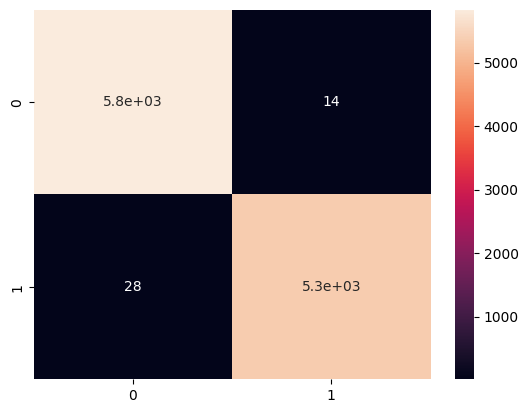

In [39]:
from sklearn.metrics import confusion_matrix
a=confusion_matrix(y_test,preddt)
sns.heatmap(a, annot=True)
plt.show()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

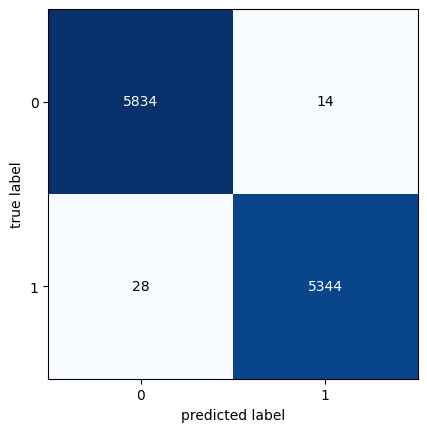

In [41]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(a)

In [37]:
de.score(xv_test, y_test)

0.9962566844919786

In [109]:
print(classification_report(y_test, preddt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5889
           1       0.99      0.99      0.99      5331

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [110]:
print(accuracy_score(y_test, preddt))

0.9948306595365419


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grd=GradientBoostingClassifier(random_state=0)
grd.fit(xv_train,y_train)

In [ ]:
predgrd=grd.predict(xv_test)
preddt

In [ ]:
grd.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, predgrd))

In [ ]:
print(accuracy_score(y_test, predgrd))

In [44]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier(random_state=0)
rand.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [64]:
predrand=rand.score(xv_test, y_test)

In [ ]:
grd.score(xv_test, y_test)

In [69]:
print(classification_report(y_test, predrand))
print(accuracy_score(y_test, predrand))


InvalidParameterError: The 'y_pred' parameter of classification_report must be an array-like or a sparse matrix. Got 0.9880570409982175 instead.

In [52]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    # Ensure 'wordopt' function exists
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)

    # Apply text preprocessing
    new_def_test['text'] = new_def_test['text'].apply(wordopt)  # Ensure wordopt is defined

    # Vectorization (Ensure 'vectorizer' is trained)
    new_x_test = new_def_test['text']
    new_xv_test = vectorizer.transform(new_x_test)  # Ensure vectorizer is defined

    # Model Predictions (Ensure lg and de are trained models)
    pred_lg = lg.predict(new_xv_test)  # Ensure lg is defined
    pred_de = de.predict(new_xv_test)  # Ensure de is defined

    # Return predictions instead of printing
    return print(f"\n\nLinear Regression Prediction: {output_label(pred_lg[0])} \nDecision Tree Prediction: {output_label(pred_de[0])}")


In [53]:
#  testing 
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return " Not A Fake News"
def manual_testing(news):
    testing_news={"text": [news]}
    new_def_test=pd.DataFrame(testing_news)
    
    new_def_test['text']=new_def_test['text'].apply(wordopt)
    
    new_x_test=new_def_test['text']
    new_xv_test=vectorizer.transform(new_x_test)
    
    pred_lg=lg.predict(new_xv_test)
    pred_de=de.predict(new_xv_test)
    return print("\n\n LinearRegression presiction: {} \ndecision Tree Prediction: {}".format(output_label(pred_lg[0]), output_label(pred_de[0])))
    



In [59]:
news=str(input())
print(news)
manual_testing(news)

(Reuters) - A U.S. appeals court on Friday said President Donald Trumpâ€™s hotly contested travel ban targeting people from six Muslim-majority countries should not be applied to people with strong U.S. ties. The 9th U.S. Circuit Court of Appeals, which covers several West Coast states, also said its ruling would be put on hold pending a decision on the latest version of the travel ban from the Trump administration by the U.S. Supreme Court. Since taking office in January, Trump has been struggling to enact a ban that passes court muster. A three-judge panel from the 9th Circuit narrowed a previous injunction from a lower federal court to those people â€œwith a credible bona fide relationship with the United States.â€ It also said that while the U.S. president has broad powers to regulate the entry of immigrants into the United States, those powers are not without limits. â€œWe conclude that the Presidentâ€™s issuance of the Proclamation once again exceeds the scope of his delegated a